# What is diabetes ?
Acccording to NIH, "Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.

## Types of diabetes ?
 The most common types of diabetes are type 1, type 2, and gestational diabetes.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Read data
Loading dataset with pandas (pd)

In [2]:
df = pd.read_csv('Dataset\diabetes.csv')


## 2. Overview

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* In this dataset has 768 not-null rows out of 0 to 767 rows .



The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.



## Checking Statistics


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Among the features, there are many features whose min() values is 0. let's check out more of these features.

## Detecting null values

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are not a null values.

In [8]:
import numpy as np
#This function highlight the minimum values for every columns
def highlight_min(s,props = ''):
    return np.where(s == np.nanmin(s.values), props,'')

df.describe().style.apply(highlight_min,props='color:Black;background-color:Grey')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


This summary shows the some columns has minimum values of below zero(0).

So, on these columns, a value of Zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

1. Pregnancies

2. Glucose

3. BloodPressure

4. SkinThickness

5. Insulin

6. BMI

<b> so, It is better to replace zeros with NaN since after that counting them would be easier and NaN values should be need to replaced with suitable values.</b>

In [9]:
df_new = df
df_new[["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]]=df_new[["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0,np.NaN)

In [10]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [11]:
df.isna().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

There are high null value in Insulin 374 and low null value in Glucose 5.

So, we need to fill the null values to understood the data distribution.

Some method to fill the Null values:

* Mean
* meadian

## Visulize the nan values

<Axes: >

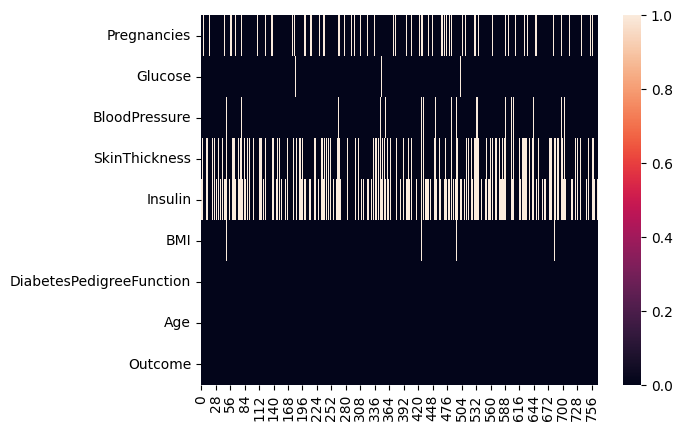

In [12]:
sns.heatmap(df.isna().T)

In this heatmap white color show the null values. In certail columns:

* Pregnancies                 
* Glucose                       
* BloodPressure                
* SkinThickness              
* Insulin                    
* BMI 

Text(0.5, 1.0, 'Matrix Plot of Missing Values')

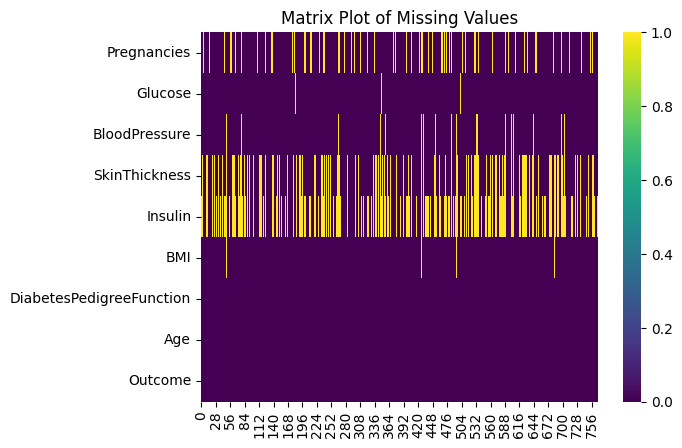

In [13]:
sns.heatmap(df.isnull().T, cmap='viridis', cbar=True, yticklabels=True)
plt.title('Matrix Plot of Missing Values')


## Exploratory data analysis (EDA)

In [14]:
# Count diabetes shoub be positive or negative
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

There are  500 people should be negative diabetes, and 268 people should be positive diabetes. so, data is imbalance

<Axes: xlabel='Outcome', ylabel='count'>

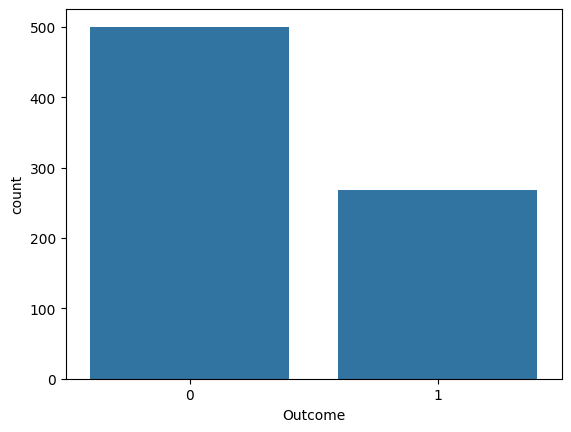

In [15]:
sns.countplot(x='Outcome',data=df)

* If Dependent (y) has an imbalance values in categorical data we cann't predict a model

([<matplotlib.patches.Wedge at 0x1db498b47d0>,
 [Text(-0.5025943242672991, 0.9784676515931925, '0'),
  Text(0.5025944158780503, -0.9784676045369114, '1')],
 [Text(-0.27414235869125403, 0.5337096281417413, '65.10%'),
  Text(0.2741424086607547, -0.5337096024746789, '34.90%')])

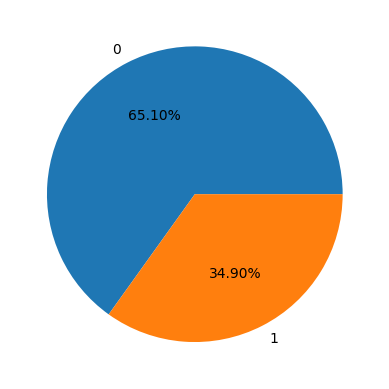

In [16]:
s = df.Outcome.value_counts()
plt.pie(x=s.values,labels=s.index,autopct='%.2f%%')

* Class 0 is 65% and class 1 is 35% which means data is imbalance.

If data is imbalance we use Oversampling and Undersampling technique to balace the data, or use SMOTE technique. If the data is imbalance accuracy mightnot be a good metic.

* Undersampling :  To remove the sample to equal the majority data.

* Oversampling : Duplicate the sample to eqaul the minority data.


In [17]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.166329,0.285013,0.167298,0.104081,0.128207,-0.006459,0.550525,0.268218
Glucose,0.166329,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.285013,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.167298,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.104081,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.128207,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.006459,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.550525,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.268218,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


<Axes: >

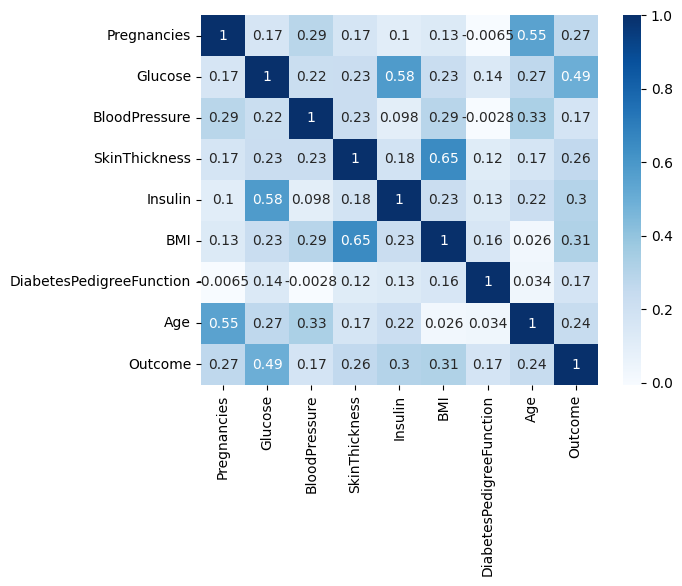

In [18]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [19]:
sns.pairplot(df,hue='Outcome') 